<a href="https://colab.research.google.com/github/GayanthaL/Data-mining-mini-project/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the data set

import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Data_mining/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Ignore warnings for more covinience
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


### **Data Visualization**

### Target Variable Distribution

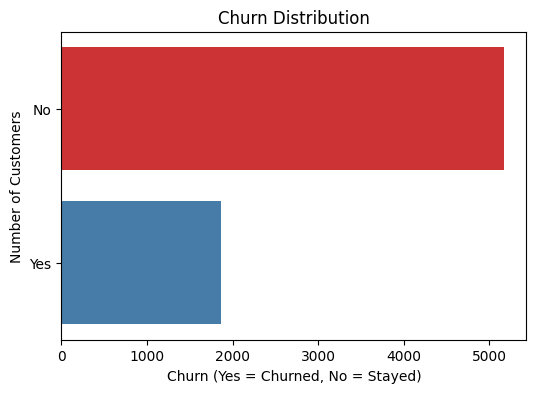

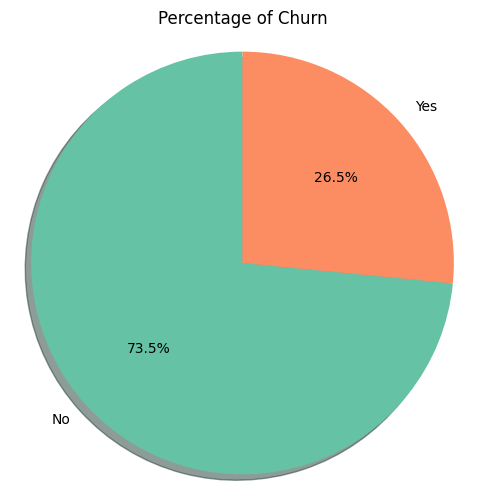

In [ ]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data['Churn'], palette='Set1')
plt.title('Churn Distribution')
plt.xlabel('Churn (Yes = Churned, No = Stayed)')
plt.ylabel('Number of Customers')
plt.show()

# Churn Percentage Pie Chart
plt.figure(figsize=(6, 6))  # Making the figure square for the pie chart
plt.pie(data['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, shadow=True, colors=['#66c2a5', '#fc8d62'])
plt.title('Percentage of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

### Numerical Features Distributions

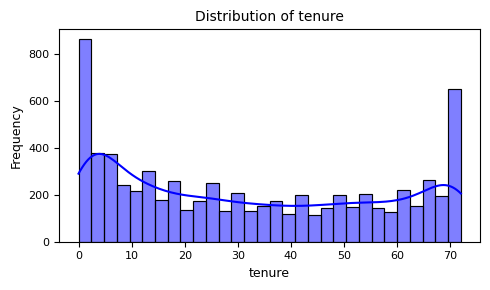

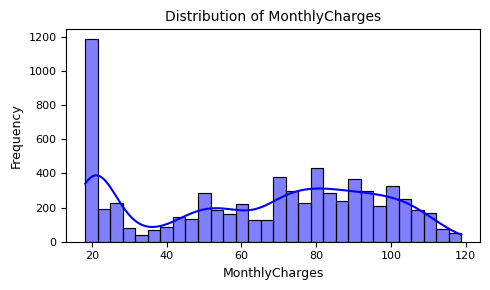

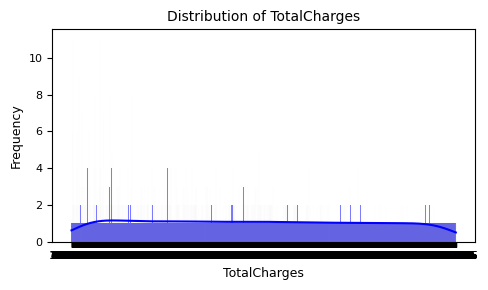

In [ ]:
# List of numerical features to visualize
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through the numerical features and plot their distributions
for feature in numerical_features:
    plt.figure(figsize=(5, 3))  # Reduced figure size
    sns.histplot(data[feature], kde=True, color='blue', bins=30)  # KDE overlay on histogram
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.xticks(fontsize=8)  # Reduce x-axis tick font size
    plt.yticks(fontsize=8)  # Reduce y-axis tick font size
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()


### Relationship between Churn and few features

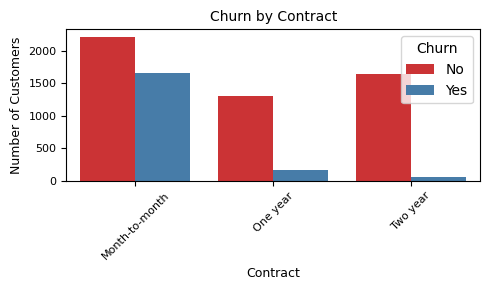

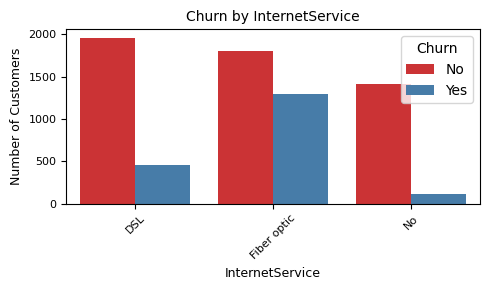

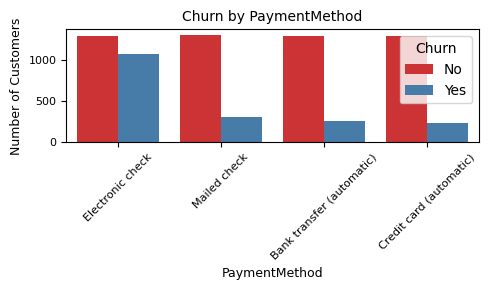

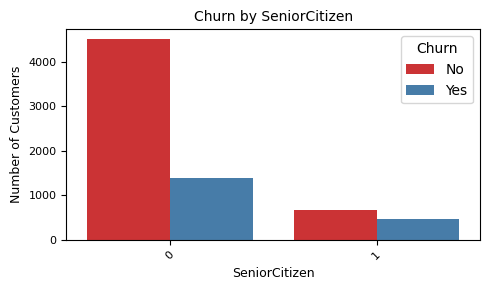

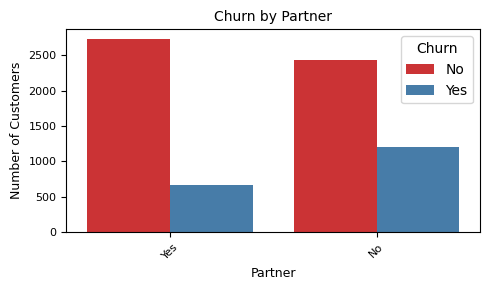

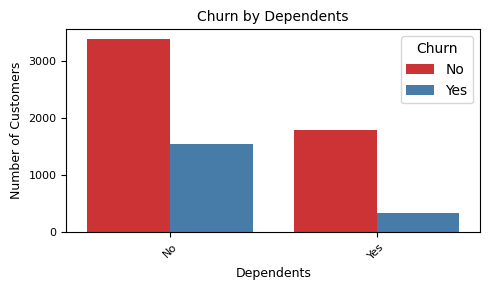

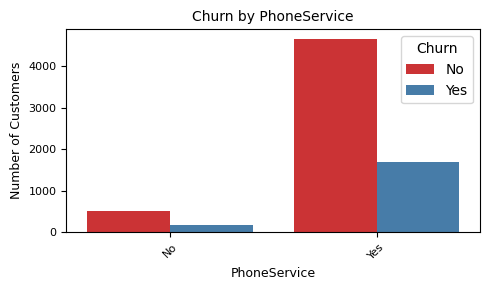

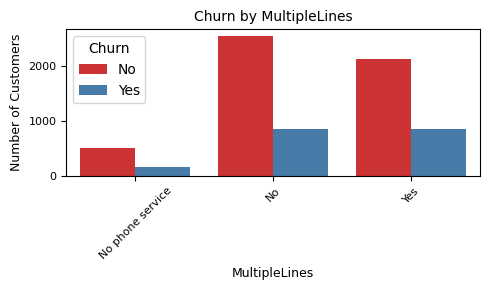

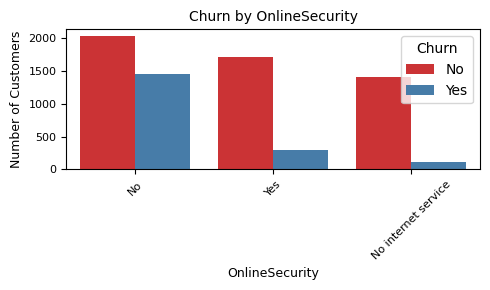

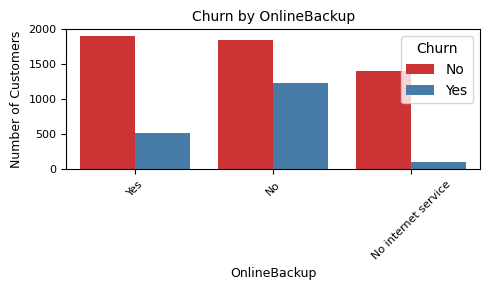

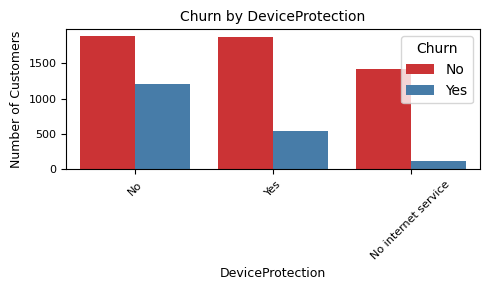

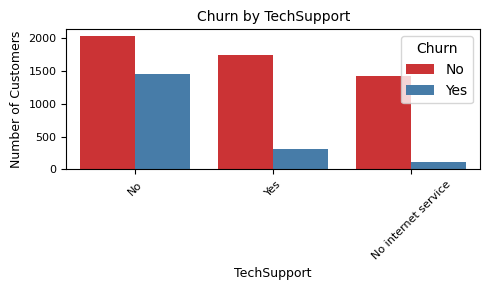

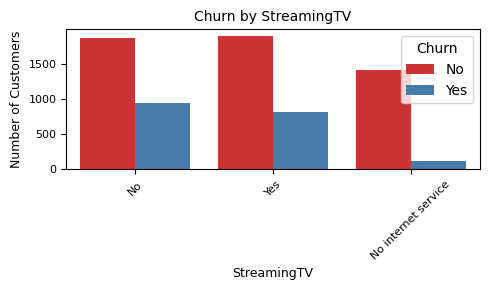

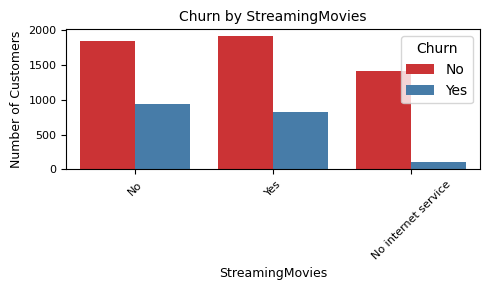

In [ ]:
# List of categorical features to visualize against 'Churn'
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through the categorical features and plot their relationship with Churn
for feature in categorical_features:
    plt.figure(figsize=(5,3))  # Reduced figure size
    sns.countplot(x=feature, hue='Churn', data=data, palette='Set1')
    plt.title(f'Churn by {feature}', fontsize=10)
    plt.xlabel(f'{feature}', fontsize=9)
    plt.ylabel('Number of Customers', fontsize=9)
    plt.xticks(rotation=45, fontsize=8)  # Rotate x labels and reduce font size
    plt.yticks(fontsize=8)  # Reduce y-axis tick font size
    plt.tight_layout()  # Adjust layout to fit everything properly
    plt.show()



### **Distribution Analysis**

### Pairplot for Numerical Features

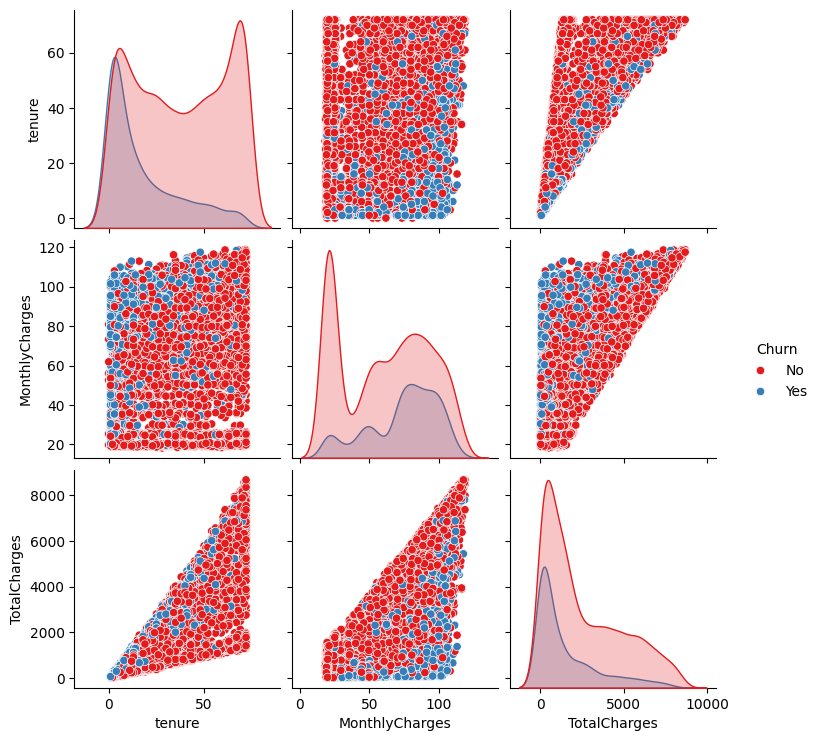

In [ ]:
# Convert TotalCharges to numeric, as it might have missing or invalid entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Pairplot for numerical features
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set1')
plt.show()


In [ ]:
# Summary statistics for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
summary_statistics = data[numerical_features].describe()
print("Summary Statistics for Numerical Features:")
print(summary_statistics)


Summary Statistics for Numerical Features:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


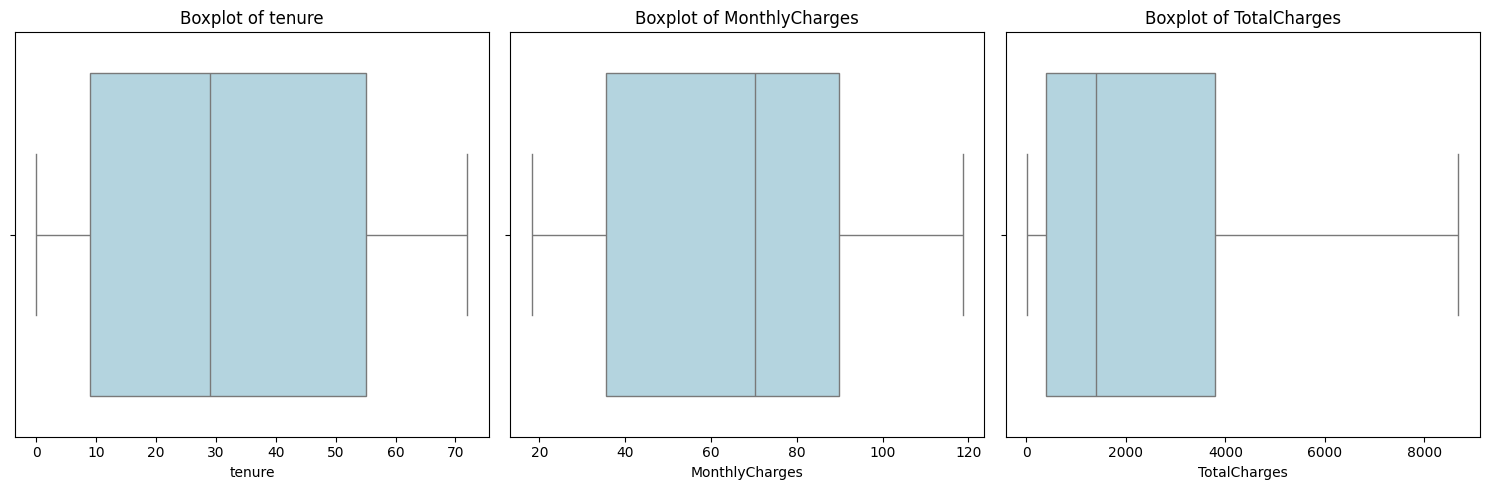

In [ ]:
# List of numerical features to visualize for outliers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through the numerical features and plot boxplots to identify outliers
plt.figure(figsize=(15, 5))  # Adjust size as needed
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)  # Create subplots
    sns.boxplot(x=data[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


### **Correlation Analysis**

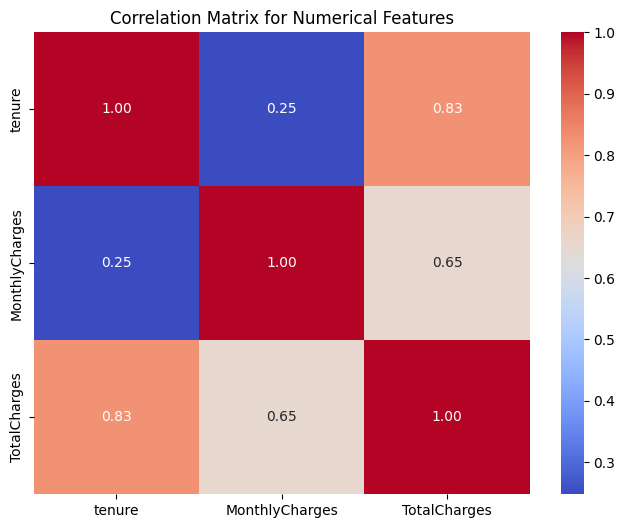

In [ ]:
# Convert TotalCharges to numeric (if not done already)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


### **Find the unique values**

In [ ]:
# Find unique values in each feature
unique_values = {column: data[column].unique() for column in data.columns}

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank tra

In [ ]:
# Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 7043 Rows and 21 columns


In [ ]:
# Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Impute missing values in TotalCharges with the median
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'] = data['TotalCharges'].fillna(median_total_charges)

# Verify that all missing values are handled
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data.drop(['customerID'],axis=1,inplace=True)
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Get the categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Create the one-hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
encoded_data = onehot_encoder.fit_transform(data[categorical_cols])

# Create the encoded dataframe
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded data with the original dataframe
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data = data.drop(categorical_cols, axis=1)

# Drop the 'Churn_No' column (if it exists)
if 'Churn_No' in data.columns:
    data.drop('Churn_No', axis=1, inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

# Preview the updated dataframe
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### **Split the data**

In [ ]:
# Split
X = data.drop(['Churn_Yes'],axis=1)
y = data['Churn_Yes']
keys = X.columns
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.5 MB/s eta 0:00:00


### **Data balancing**

In [ ]:
from imblearn.combine import SMOTEENN

# Apply SMOTEN to the training data
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)
# Print the shapes after applying SMOTEN
print('X_resampled shape is ', X_resampled.shape)
print('y_resampled shape is ', y_resampled.shape)

X_resampled shape is  (6148, 45)
y_resampled shape is  (6148,)
